<center>
    <h1> Extended Project Supplement</h1>
</center>

Interactive plots + animations corresponding to figures
- Code for all figures??
- Numerical Methods 
- Application to model
- Space homogeneity
- Space inhomogeneity
- Python .py file too?


In [1]:
import numpy as np
from numpy.random import normal, uniform
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
sns.set()
sns.color_palette('colorblind')
cmap = plt.get_cmap('plasma')


from src import herding as herd
from src import ToyProblems as TP
from src import SpaceHom as hom
from src.plotting import hom_plot as homplt

savepath = './Report/Figures/'
save = False

## Toy Problems

- Heat eqn, adv eqn
- Mesh refinement error
- OU particles

### Heat Equation

Solving the heat equation using finite differences. To see the sensitivity of FTCS on mesh size, try violating the stability condition $\frac{\sigma \Delta t}{\Delta x}^2 < \frac{1}{2}$. For example, set `diffusion = 1, timestep = 0.01, spacestep = 0.1`

In [ ]:
%matplotlib inline
diffusion = 1
timestep = 0.005
spacestep = 0.1
T_final = 5
domain_size = 5
def indicator(x): return np.array([int(i>=-1 and i<=0) for i in x])
def gaussian(x): return stats.norm.pdf(x, loc=0, scale=1)

initial_data = gaussian
diff_solvers = [TP.FTCS, TP.BTCS, TP.CN]

###############################################################################
fig, ax = plt.subplots(len(diff_solvers), 1, figsize=(10,10))
#fig.suptitle('Heat Equation in 1D', fontsize=16)

if len(diff_solvers)==1:
    ax = [ax]

for idx, solver in enumerate(diff_solvers):
    x, sol = TP.solve_heat_eqn(solver=solver, dt=timestep, dx=spacestep,
                            T_end=T_final, L=domain_size, initial_dist=initial_data)
    homplt.static_line(x, sol, solver, ax[idx])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

if save:
    plt.savefig(savepath+'{}.eps'.format(timestep), format='eps', dpi=1000)

### Advection Equation

Solving the advection equation using finite differences and finite volumes. Both methods are sensitive to mesh spacing. For example, set `wavespeed = 1, timestep = 0.21, spacestep = 0.1`. Also note the artificial dispersion introduced, regardless of spacing.

In [ ]:
wavespeed = 0.5
T_final = 3
timestep = 0.01
spacestep = 0.1
domain_size = 5 
def indicator(x): return np.array([int(i>=-1 and i<=0) for i in x])
def gaussian(x): return stats.norm.pdf(x, loc=0, scale=1)
initial_data = indicator
adv_solvers = [TP.upwind, TP.FV_upwind]


###############################################################################
fig, ax = plt.subplots(len(adv_solvers), 1, figsize=(10,10))
#fig.suptitle('Advection Equation in 1D', fontsize=16)
cmap = plt.get_cmap('plasma')
if len(adv_solvers)==1:
    ax = [ax]
for idx, solver in enumerate(adv_solvers):
    adv_x, adv_sol = TP.solve_adv_eqn(solver=solver, a=wavespeed,
                                      dt=timestep, dx=spacestep,
                                      T_end=T_final, L=domain_size,
                                      initial_dist=initial_data)
    homplt.static_line(adv_x, adv_sol, solver, ax[idx])
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

if save:
    plt.savefig(savepath+'adv'+initial_data.__name__+'.eps', format='eps', dpi=1000)

### Particle System with Langevin Dynamics


Outputs an animation of histogram of particles at each timestep. Along with the mean velocity and variance of all particles at each timestep.

In [3]:
%matplotlib qt
particle_count = 1000
diffusion = 1
initial_data = uniform(low=2, high=4, size=particle_count)
timestep = 0.01
T_final = 5

animate = True
#If animation is too slow, increase framestep.
framestep = 1
###############################################################################
t, x, [m1, var] = TP.run_OU_process(particles=particle_count,
                   D=diffusion,
                   initial_dist=initial_data,
                   dt=timestep,
                   T_end=T_final)
ani = homplt.anim_hist_moments(t, x, m1, var, mu=0,
                               D=diffusion, fs=framestep, animate=animate)
plt.show()

Plot histogram of positions and 5 sample paths

C:\Users\s1415551\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


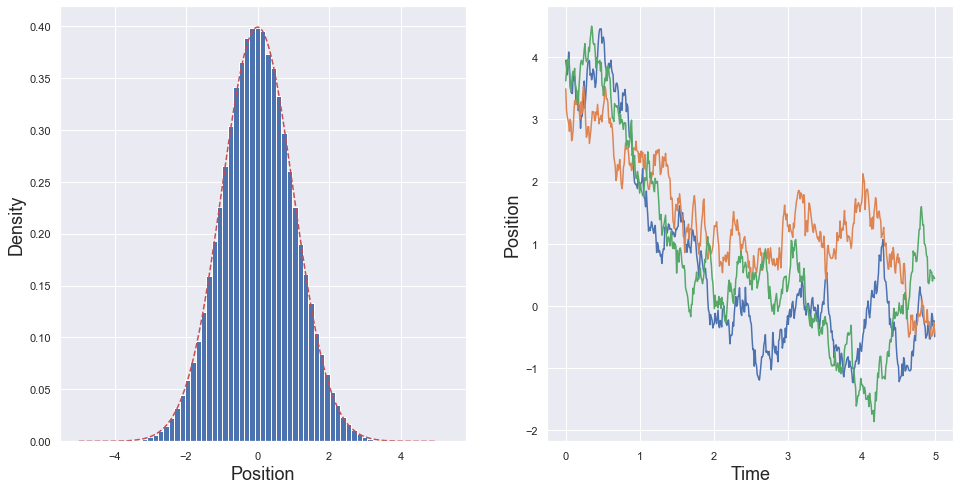

In [7]:
%matplotlib inline
T_final = 100

###############################################################################
t, x, [m1, var] = TP.run_OU_process(particles=particle_count,
                   D=diffusion,
                   initial_dist=initial_data,
                   dt=timestep,
                   T_end=T_final)

fig, ax = plt.subplots(1,2, figsize=(16,8))
n_x, bins_x, patches_x = ax[0].hist(x[-750:].flatten(),
                                    bins=np.arange(x.min(), x.max(), 0.15),
                                    density=True, label='Position')

mu = 0
D = 1
sigma = np.sqrt(D)
_x = np.arange(mu - 5*sigma, mu + 5*sigma, 0.01)
stat_dist = stats.norm.pdf(_x, mu, sigma)

ax[0].plot(_x, stat_dist, 'r--')
ax[0].set_xlabel('Position', fontsize=18)
ax[0].set_ylabel('Density', fontsize=18)
for _ in range(3):
    ax[1].plot(t[:500], x[:500,_], label='Particle {}'.format(_+1))
ax[1].set_xlabel('Time', fontsize=18)
ax[1].set_ylabel('Position', fontsize=18)
fig.show()
if save:
    fig.savefig(savepath+'OUparticletraj.eps', format='eps', dpi=1000)


# Space Homogeneous System

## Particle Model Simulation

OU process is same as space homogeneous with no interaction. Combine Interaction, histograms 


In [5]:
%matplotlib qt
particle_count = 1000
diffusion = 1
initial_data = uniform(low=-2, high=1, size=particle_count)
timestep = 0.01
T_final = 50
herding_function = herd.smooth_G

framestep = 5
animate = True

t, v, [M1, var] = hom.run_particle_model(particles=particle_count,
                   D=diffusion,
                   initial_dist=initial_data,
                   dt=timestep,
                   T_end=T_final,
                   G=herding_function)

n, bins, patches = plt.hist(v[-500:].flatten(), bins=np.arange(v.min(), v.max(), 0.15),
                           density=True, label='Velocity')
stat_mu = np.sign(v[0,].mean())
stat_sigma = np.sqrt(diffusion)
_v = np.arange(stat_mu - 5*stat_sigma, stat_mu + 5*stat_sigma, 0.01)
stat_dist = stats.norm.pdf(_v, stat_mu, stat_sigma)

plt.plot(_v, stat_dist, '-.',label=r'Stationary D$^{\mathrm{n}}$')
plt.show()


ani = homplt.anim_hist_moments(t, v, M1, var, mu=stat_mu,
                               D=diffusion, fs=framestep, animate=animate)
plt.show()

In [6]:
# writer = animation.FFMpegWriter(fps=20, extra_args=['-vcodec', 'libx264'])
# ani.save('lowparticleswitch.mp4', writer=writer)

C:\Users\s1415551\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


## Kinetic Model

switch animation

In [5]:
%matplotlib qt
particle_count = 6
diffusion = 1
initial_data = uniform(low=-2, high=1, size=particle_count)
timestep = 0.01
T_final = 500
herding_function = herd.smooth_G

framestep = 50
animate = True

t, v, [M1, var] = hom.run_particle_model(particles=particle_count,
                   D=diffusion,
                   initial_dist=initial_data,
                   dt=timestep,
                   T_end=T_final,
                   G=herding_function)
stat_mu = np.sign(v[0,].mean())
stat_sigma = np.sqrt(diffusion)
_v = np.arange(stat_mu - 5*stat_sigma, stat_mu + 5*stat_sigma, 0.01)
stat_dist = stats.norm.pdf(_v, stat_mu, stat_sigma)

ani = homplt.anim_hist_moments(t, v, M1, var, mu=stat_mu,
                               D=diffusion, fs=framestep, animate=animate, timeavg=True)
plt.show()

## Kinetic Model

## PDE Simulation
- FD
- Space hom show agreement with particle model in histogram
- Exponential Convergence of moments
- Long time L1 error, asymmetry
- FV method
- agreement in histogram, visual with FD
- symmetric error
- Mesh refinement errors
- 


## Space Het Particle Model
Visual switch